In [1]:
! pip install scikit-image

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
# import your code
from encoder import encode, header_bits
from decoder import decode
import numpy as np
import matplotlib.pyplot as plt
import operator

from cued_sf2_lab.familiarisation import load_mat_img, plot_image

from simple_lbt_functions import *

from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.laplacian_pyramid import bpp


from scipy.optimize import minimize

from cued_sf2_lab.dct import * #regroup, regroup_inverse


Forward 8 x 8 DCT
Quantising to step size of 20
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 56279
Bits for huffman table = 1424
Bits: 56279
1424
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 40.0
Inverse 8 x 8 DCT

0.0 256.0
RMS = 6.5950794045006225
SSIM: 0.9209116011745336
PSNR: 30.145034215298857


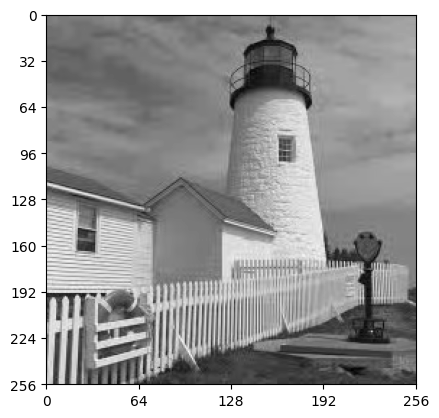

In [3]:
# Test encoder/decoder here
lighthouse, _ = load_mat_img('lighthouse.mat', img_info='X')
X = lighthouse - 128.0

#encode
step = 20
vlc, header = encode(X,jpeg_quant_size = step)
bits = vlc[:,1].sum()
print(f"Bits: {bits}")
print(header_bits(header))

#decode
Z = decode(vlc, header)
print(np.min(Z), np.max(Z)) # min max of Z
#print(Z[::64,::64].astype(int)) # typical numbers

fig, ax = plt.subplots()
plot_image(Z)

print(f"RMS = {np.std(lighthouse-Z)}")
# Assuming X is the original image and Z is the compressed image

# Calculate SSIM
ssim_index = ssim(lighthouse, Z, data_range=Z.max() - Z.min())

# Calculate PSNR
psnr_value = psnr(lighthouse, Z, data_range=Z.max() - Z.min())

print("SSIM:", ssim_index)
print("PSNR:", psnr_value)

#print(np.min(X), np.max(X))
#print(np.min(Z), np.max(Z))